In [1]:
import cv2
import tensorflow as tf
from os import listdir
from matplotlib import image
from PIL import Image
import matplotlib.pyplot as plt

/home/subhodeep/miniconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/subhodeep/miniconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/subhodeep/miniconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/subhodeep/miniconda3/envs/ML/lib/python3

In [2]:
CATEGORIES = ["anticlockwise","clockwise"]

def prepare(file):
    IMG_SIZE = 80
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [3]:
model = tf.keras.models.load_model('CNN.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


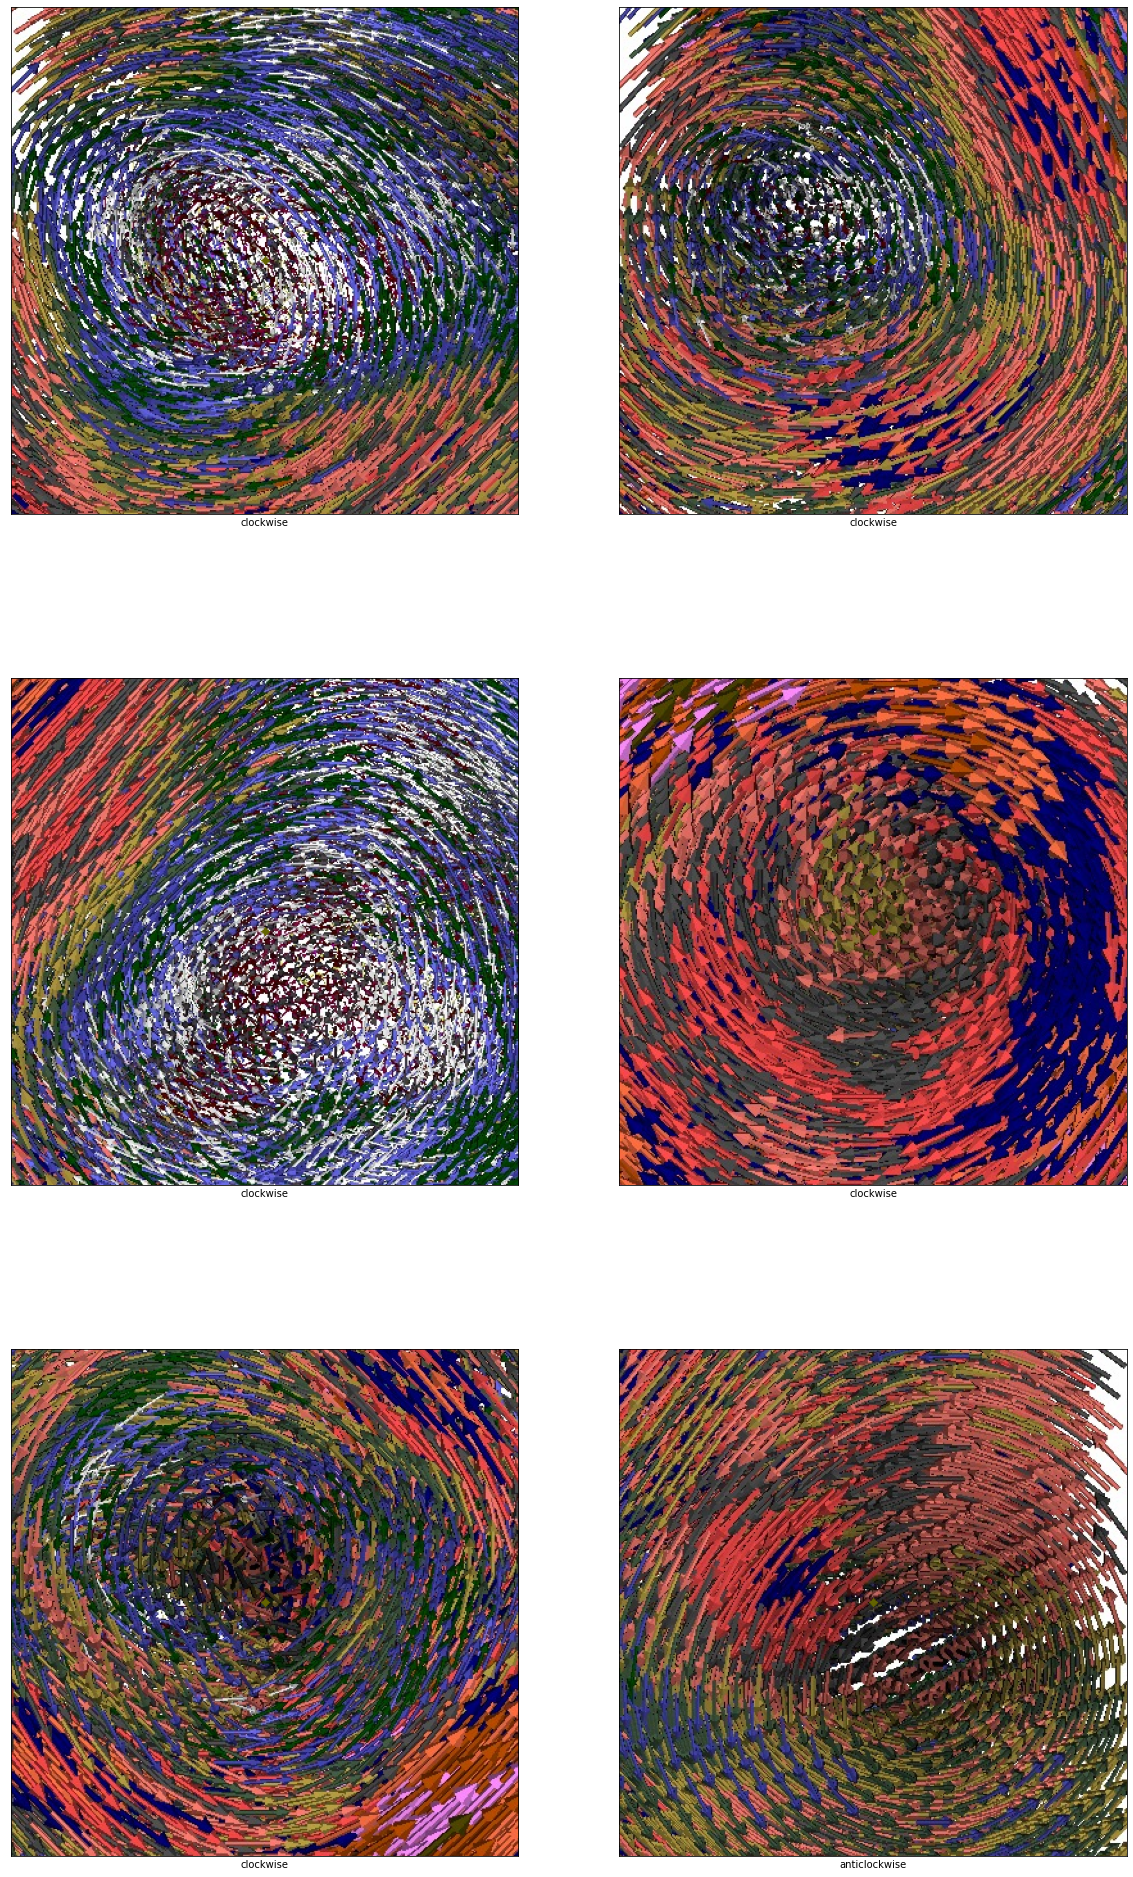

In [4]:
plt.figure(figsize=(20,72))
i = 0

for filename in listdir('Test'):
    img_dir = 'Test/' + filename
    img = prepare(img_dir)
    img_data = Image.open(img_dir)
    plt.subplot(6,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_data)
    prediction = model.predict([img])
    prediction = list(prediction[0])
    name = CATEGORIES[prediction.index(max(prediction))]
    plt.xlabel(name)
    i = i+1
    
plt.show()